In [4]:
import pandas as pd

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [163]:
!ls

Analytics zdravcity.ru_ Все данные по веб-сайту Основные последовательности конверсий 20190801-20190930 (1).csv
Analytics zdravcity.ru_ Все данные по веб-сайту Основные последовательности конверсий 20190801-20190930.csv
Untitled.ipynb
ZAOTsentrvnedreniyaPROTEKmsk_direct_keys_01.08-30.09_by_date.csv
gaa_age_gender0 (2).csv
gaa_age_gender1 (2).csv
gaa_browser0.csv
gaa_browser1.csv
gaa_browser_and_version0.csv
gaa_browser_and_version0.xls
gaa_browser_and_version1.csv
gaa_geo0.csv
gaa_geo1.csv
gaa_keyword0.csv
gaa_keyword1.csv
gaa_mobile1.csv
gaaa
gaaa.zip
gaaaa0.csv
gaaaa1.csv


In [111]:
# analytics_zdravcity = pd.resd_csv('Analytics zdravcity.ru_ Все данные по веб-сайту Основные последовательности конверсий 20190801-20190930 (1).csv')
# analytics_zdravcity_1 = pd.read_csv('Analytics zdravcity.ru_ Все данные по веб-сайту Основные последовательности конверсий 20190801-20190930.csv')
gaa_browser0 = pd.read_csv('gaa_browser0.csv')
gaa_browser1 = pd.read_csv('gaa_browser1.csv')
gaa_browser_and_version0 = pd.read_csv('gaa_browser_and_version0.csv', error_bad_lines = False)
gaa_browser_and_version1 = pd.read_csv('gaa_browser_and_version1.csv', error_bad_lines = False)
gaa_geo0 = pd.read_csv('gaa_geo0.csv')
gaa_geo1 = pd.read_csv('gaa_geo1.csv')
gaa_keyword0 = pd.read_csv('gaa_keyword0.csv')
gaa_keyword1 = pd.read_csv('gaa_keyword1.csv')
gaa_mobile1 = pd.read_csv('gaa_mobile1.csv')
gaaaa0 = pd.read_csv('gaaaa0.csv')
gaaaa1 = pd.read_csv('gaaaa1.csv')

b'Skipping line 13791: expected 14 fields, saw 15\n'
b'Skipping line 13662: expected 7 fields, saw 8\n'


In [171]:
pd.read_csv('gaa_age_gender0 (2).csv').#['ga:adcontent'].unique()

,ga:date,ga:adcontent,ga:userAgeBracket,ga:userGender,ga:sessions,ga:avgSessionDuration,ga:bounceRate,ga:hits,ga:transactions,ga:transactionRevenue,ga:users,ga:newUsers,ga:percentNewSessions,ga:productAddsToCart
0,20190801,(not set),18-24,female,1383,103.088937,8.098337,35750,19,37264.171254,1327,1009,72.957339,112
1,20190801,(not set),18-24,male,579,132.302245,3.281520,16539,37,20575.653235,505,505,87.219344,131
2,20190801,(not set),25-34,female,9774,133.509208,10.323307,252383,224,371745.428867,8746,6261,64.057704,1532
3,20190801,(not set),25-34,male,4111,106.323766,9.997568,99757,37,61540.078205,3607,2803,68.182924,131
4,20190801,(not set),35-44,female,6821,155.749157,12.051019,173389,187,153103.603917,5999,4205,61.647852,841


In [123]:
import csv
ZAOTsentrvnedreniyaPROTEKm = pd.read_csv('ZAOTsentrvnedreniyaPROTEKmsk_direct_keys_01.08-30.09_by_date.csv', sep = ';', error_bad_lines = False, quoting=csv.QUOTE_NONE)

/Users/mikhailgubarenko/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [137]:
ZAOTsentrvnedreniyaPROTEKm['Дата'][0]

'18-09-2019'

In [112]:
def fix_browser_columns(df):
    df.columns = [x.split(":")[1] for x in df.columns]
    return df
 
def parse_adcontent_column(df):
    if "adcontent" not in df.columns:
        print("adcontent column is not present, skipping parsing")
        return df
    adcontent_columns = ["k50id", "cid", "gid", "aid", "adp", "pos", "src", "dvc"]
   
    for i, adcontent_col in enumerate(adcontent_columns):
        adcontent_lambda = lambda x: x.split("|")[2 * i + 1] if len(x.split("|")) > 14 else None  
        df[adcontent_col] = df.adcontent.apply(adcontent_lambda)
       
    return df.drop("adcontent", axis=1)


In [113]:
gaa_browser0 = fix_browser_columns(gaa_browser0)
gaa_browser1 = fix_browser_columns(gaa_browser1)
gaa_browser_and_version0 = fix_browser_columns(gaa_browser_and_version0)
gaa_browser_and_version1 = fix_browser_columns(gaa_browser_and_version1)
gaa_geo0 = fix_browser_columns(gaa_geo0)
gaa_geo1 = fix_browser_columns(gaa_geo1)
gaa_keyword0 = fix_browser_columns(gaa_keyword0)
gaa_keyword1 = fix_browser_columns(gaa_keyword1)
gaa_mobile1 = fix_browser_columns(gaa_mobile1)
gaaaa0 = fix_browser_columns(gaaaa0)
gaaaa1 = fix_browser_columns(gaaaa1)

gaa_browser0 = parse_adcontent_column(gaa_browser0)
gaa_browser1 = parse_adcontent_column(gaa_browser1)
gaa_browser_and_version0 = parse_adcontent_column(gaa_browser_and_version0)
gaa_browser_and_version1 = parse_adcontent_column(gaa_browser_and_version1)
gaa_geo0 = parse_adcontent_column(gaa_geo0)
gaa_geo1 = parse_adcontent_column(gaa_geo1)
gaa_keyword0 = parse_adcontent_column(gaa_keyword0)
gaa_keyword1 = parse_adcontent_column(gaa_keyword1)
gaa_mobile1 = parse_adcontent_column(gaa_mobile1)
gaaaa0 = parse_adcontent_column(gaaaa0)
gaaaa1 = parse_adcontent_column(gaaaa1)

In [ ]:
browser
browser, browserVersion
region, city
keyword

In [148]:
gaa_browser0.head()

,date,browser,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,newUsers,percentNewSessions,productAddsToCart,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,Chrome,19,11.789474,0.0,766,0,0.000000,19,0,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,Edge,37,14.135135,0.0,112,0,0.000000,19,0,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,YaBrowser,19,20.631579,0.0,93,0,0.000000,19,19,100.0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,Chrome,19,9.842105,0.0,37,0,0.000000,19,0,0.0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,YaBrowser,19,2158.947368,0.0,8466,19,9484.236164,19,0,0.0,75,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [149]:
gaa_browser1.head()

,date,browser,uniquePageviews,goal5Completions,goal6Completions,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,Chrome,19,0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,Edge,37,0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,YaBrowser,19,0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,Chrome,19,0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,YaBrowser,280,0,0,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [162]:
gaa_browser1['browser'].value_counts()

Chrome               7624
YaBrowser            5606
Firefox              1566
Safari               1399
Android Webview      1169
Opera                1127
Internet Explorer     876
Edge                  628
Samsung Internet      572
UC Browser             75
MRCHROME               53
Android Browser        19
Opera Mini              9
Safari (in-app)         8
(not set)               8
SeaMonkey               3
YE                      2
Maxthon                 2
PlayFreeBrowser         1
Puffin                  1
Name: browser, dtype: int64

In [150]:
gaa_browser_and_version0.head()

,date,browser,browserVersion,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,...,percentNewSessions,productAddsToCart,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,Chrome,75.0.3770.142,19,11.789474,0.0,766,0,0.000000,19,...,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,Edge,14.14393,37,14.135135,0.0,112,0,0.000000,19,...,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,YaBrowser,19.7.0.117.00,19,20.631579,0.0,93,0,0.000000,19,...,100.0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,Chrome,75.0.3770.143,19,9.842105,0.0,37,0,0.000000,19,...,0.0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,YaBrowser,19.7.0.1635,19,2158.947368,0.0,8466,19,9484.236164,19,...,0.0,75,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [151]:
gaa_browser_and_version1.head()

,date,browser,browserVersion,uniquePageviews,goal5Completions,goal6Completions,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,Chrome,75.0.3770.142,19,0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,Edge,14.14393,37,0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,YaBrowser,19.7.0.117.00,19,0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,Chrome,75.0.3770.143,19,0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,YaBrowser,19.7.0.1635,280,0,0,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [152]:
gaa_geo0.head()

,date,region,city,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,...,percentNewSessions,productAddsToCart,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,Moscow,Moscow,19,11.789474,0.0,766,0,0.000000,19,...,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,Moscow,Moscow,37,14.135135,0.0,112,0,0.000000,19,...,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,Moscow,Moscow,19,20.631579,0.0,93,0,0.000000,19,...,100.0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,Moscow Oblast,Zheleznodorozhny,19,9.842105,0.0,37,0,0.000000,19,...,0.0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,Kaluga Oblast,Kaluga,19,2158.947368,0.0,8466,19,9484.236164,19,...,0.0,75,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [153]:
gaa_geo1.head()

,date,region,city,goal5Completions,goal6Completions,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,Moscow,Moscow,19,0,0100000014522915331_,37550879,3506040870,6378265994,no,premium2,search_none,mobile
1,20190801,Moscow,Moscow,19,0,0100000014523688485_,37552048,3506124160,6378693208,no,premium1,search_none,desktop
2,20190801,Moscow,Moscow,19,0,0100000014530412477_,37561080,3506787641,6381663516,no,premium1,search_none,desktop
3,20190801,Nizhny Novgorod Oblast,Nizhny Novgorod,19,0,0100000014771840703_,38192721,3540910033,6512198988,no,premium1,search_none,desktop
4,20190801,Saint Petersburg,Saint Petersburg,19,0,0100000014771863180_,38192776,3540911698,6512206317,no,premium1,search_none,desktop


In [154]:
gaa_keyword0.head()

,date,keyword,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,newUsers,percentNewSessions,productAddsToCart,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,(not set),19,11.789474,0.0,766,0,0.000000,19,0,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,(not set),37,14.135135,0.0,112,0,0.000000,19,0,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,(not set),19,20.631579,0.0,93,0,0.000000,19,19,100.0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,https://med.vesti.ru/articles/doctors_patients...,19,9.842105,0.0,37,0,0.000000,19,0,0.0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,(not set),19,2158.947368,0.0,8466,19,9484.236164,19,0,0.0,75,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [155]:
gaa_keyword1.head()

,date,keyword,uniquePageviews,goal5Completions,goal6Completions,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,(not set),19,0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,(not set),37,0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,(not set),19,0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,https://med.vesti.ru/articles/doctors_patients...,19,0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,(not set),280,0,0,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [156]:
gaa_mobile1.head()

,date,mobileDeviceBranding,goal5Completions,goal6Completions,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,Apple,19,0,0100000014522915331_,37550879,3506040870,6378265994,no,premium2,search_none,mobile
1,20190801,Huawei,19,0,0100000014771912936_,38192854,3540914826,6512216451,no,premium1,search_none,mobile
2,20190801,Samsung,19,0,0100000015642951622_,40494493,3669949882,6946275653,no,other4,search_none,mobile
3,20190801,Huawei,19,0,None,None,None,None,None,None,None,None
4,20190802,Apple,19,0,0100000014774412547_,38199613,3541260182,6513371671,no,premium1,search_none,mobile


In [157]:
gaaaa0.head()

,date,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,newUsers,percentNewSessions,productAddsToCart,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,19,11.789474,0.0,766,0,0.000000,19,0,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,37,14.135135,0.0,112,0,0.000000,19,0,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,19,20.631579,0.0,93,0,0.000000,19,19,100.0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,19,9.842105,0.0,37,0,0.000000,19,0,0.0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,19,2158.947368,0.0,8466,19,9484.236164,19,0,0.0,75,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [158]:
gaaaa1.head()

,date,productRemovesFromCart,productCheckouts,transactionsPerSession,searchSessions,revenuePerUser,uniquePageviews,avgPageLoadTime,revenuePerTransaction,goal5Completions,goal6Completions,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,0,0,0.0,0,0.000000,19,0.0,0.000000,0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,0,0,0.0,0,0.000000,37,0.0,0.000000,0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,0,0,0.0,0,0.000000,19,0.0,0.000000,0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,0,0,0.0,0,0.000000,19,0.0,0.000000,0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,0,0,100.0,19,499.170324,280,0.0,499.170324,0,0,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [138]:
list(ZAOTsentrvnedreniyaPROTEKm.columns)

['Дата',
 'ConnectorId',
 '"ID Кампании"',
 '"ID Группы объявлений"',
 '"ID Фразы"',
 '"Идентификатор K50"',
 '"Фраза (ключ)"',
 '"Фраза без минус-слов"',
 'Минус-слова',
 'Ставка',
 '"Ставка в РСЯ"',
 'P11_Bid',
 'P11_Price',
 'P12_Bid',
 'P12_Price',
 'P13_Bid',
 'P13_Price',
 'P14_Bid',
 'P14_Price',
 'P21_Bid',
 'P21_Price',
 'P22_Bid',
 'P22_Price',
 'P23_Bid',
 'P23_Price',
 'P24_Bid',
 'P24_Price',
 'PriceCover20',
 'PriceCover50',
 'PriceCover100',
 'search_bids',
 'network_bids',
 '"Показы остановлены"',
 'key_ActiveStatus',
 'param1',
 'param2',
 'key_active',
 'campaign_Name',
 'campaign_IsActive',
 'campaign_StatusArchive',
 '"Название групппы"',
 '"Статус показов"',
 'campaign_tags',
 'ad_group_tags',
 'key_tags',
 '"Директ Все Расходы"',
 '"Директ Все Показы"',
 '"Директ Все Клики"',
 'shows_average_position',
 'clicks_average_position',
 '"Директ Сеть Клики"',
 '"Директ Поиск Клики"',
 '"Директ Клики в спецразмещении"',
 '"Директ Клики в гарантии и ротации"',
 '"Директ В

In [175]:
ZAOTsentrvnedreniyaPROTEKm.head()

,Дата,ConnectorId,"""ID Кампании""","""ID Группы объявлений""","""ID Фразы""","""Идентификатор K50""","""Фраза (ключ)""","""Фраза без минус-слов""",Минус-слова,Ставка,...,"""Директ ДРР""","""Директ Ср. Цена за Клик""","""Доля показов в спецразмещении""","""Директ CTR""","""Показатель Отказов""","""Ср. Время Сеанса""","""Глубина просмотра""","""Ср. позиция показов""","""Ср. позиция кликов""","""Директ Ср. Цена за 1000 показов"""
0,18-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,12.0,22.56,95.0,35.4,6.6,7.0,5.3,1.42,1.07,7987.24
1,19-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,11.4,27.20,95.0,31.8,8.8,6.0,5.8,1.58,1.18,8653.18
2,17-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,10.4,21.66,95.0,31.5,2.9,7.0,5.9,1.47,1.18,6826.62
3,24-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,8.6,28.86,91.0,27.9,11.0,7.0,5.0,1.66,1.07,8060.47
4,23-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,14.5,28.78,94.0,27.7,8.0,5.0,5.0,1.54,1.10,7983.73


In [322]:
list(ZAOTsentrvnedreniyaPROTEKm.columns)

['Дата',
 'ConnectorId',
 'ID Кампании',
 'ID Группы объявлений',
 'ID Фразы',
 'Идентификатор K50',
 'Фраза (ключ)',
 'Фраза без минус-слов',
 'Минус-слова',
 'Ставка',
 'Ставка в РСЯ',
 'P11_Bid',
 'P11_Price',
 'P12_Bid',
 'P12_Price',
 'P13_Bid',
 'P13_Price',
 'P14_Bid',
 'P14_Price',
 'P21_Bid',
 'P21_Price',
 'P22_Bid',
 'P22_Price',
 'P23_Bid',
 'P23_Price',
 'P24_Bid',
 'P24_Price',
 'PriceCover20',
 'PriceCover50',
 'PriceCover100',
 'search_bids',
 'network_bids',
 'Показы остановлены',
 'key_ActiveStatus',
 'param1',
 'param2',
 'key_active',
 'campaign_Name',
 'campaign_IsActive',
 'campaign_StatusArchive',
 'Название групппы',
 'Статус показов',
 'campaign_tags',
 'ad_group_tags',
 'key_tags',
 'Директ Все Расходы',
 'Директ Все Показы',
 'Директ Все Клики',
 'shows_average_position',
 'clicks_average_position',
 'Директ Сеть Клики',
 'Директ Поиск Клики',
 'Директ Клики в спецразмещении',
 'Директ Клики в гарантии и ротации',
 'Директ Все Клики: компьютеры',
 'Директ Все

In [338]:
adv_list_conv = []
for el in list(ZAOTsentrvnedreniyaPROTEKm['campaign_Name'].unique())[:-1]:
    adv_list_conv.append(el.replace('"', ''))

In [344]:
ZAOTsentrvnedreniyaPROTEKm['ad_group_tags']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
           ..
2131238   NaN
2131239   NaN
2131240   NaN
2131241   NaN
2131242   NaN
2131243   NaN
2131244   NaN
2131245   NaN
2131246   NaN
2131247   NaN
2131248   NaN
2131249   NaN
2131250   NaN
2131251   NaN
2131252   NaN
2131253   NaN
2131254   NaN
2131255   NaN
2131256   NaN
2131257   NaN
2131258   NaN
2131259   NaN
2131260   NaN
2131261   NaN
2131262   NaN
2131263   NaN
2131264   NaN
2131265   NaN
2131266   NaN
2131267   NaN
Name: ad_group_tags, Length: 2131268, dtype: float64

In [360]:
necessary_cols = ['Дата',
 'ID Кампании',
 'Идентификатор K50',
 'Фраза без минус-слов',
 'Ставка',
 'Ставка в РСЯ',
 'P11_Bid',
 'P12_Bid',
 'P13_Bid',
 'P14_Bid',
 'P21_Bid',
 'P22_Bid',
 'P23_Bid',
 'P24_Bid',
 'key_ActiveStatus',
 'campaign_IsActive',
 'Название групппы',
 'Директ Все Расходы',
 'Директ Все Показы',
 'Директ Все Клики',
 'shows_average_position',
 'clicks_average_position',
 'Директ Сеть Клики',
 'Директ Поиск Клики',
 'Директ Клики в спецразмещении',
 'Директ Клики в гарантии и ротации',
 'Директ Все Клики: компьютеры',
 'Директ Все Клики: планшеты',
 'Директ Все Клики: мобильные',
 'Директ Сеть Показы',
 'Директ Поиск Показы',
 'Директ Показы в спецразмещении',
 'Директ Показы в гарантии и ротации',
 'Директ Все Показы: компьютеры',
 'Директ Все Показы: планшеты',
 'Директ Все Показы: мобильные',
 'Директ Сеть Расход',
 'Директ Поиск Расход',
 'Директ Расход в спецразмещении',
 'Директ Расход в гарантии и ротации',
 'Директ Все Расходы: компьютеры',
 'Директ Все Расходы: планшеты',
 'Директ Все Расходы: мобильные',
 'shows_for_weighted_ctr',
 'Сеансы',
 'Отказы',
 'Длительность сеанса',
 'Доход',
 'Директ wCTR',
 'CTR в спецразмещении',
 'Директ Ср. объем трафика',
 'CTR в гарантии и ротации',
 'Коэф. конверсии (транзакции)',
 'Директ CPO (транзакции)',
 'CPO (транзакции)',
 'Директ ДРР',
 'Директ Ср. Цена за Клик',
 'Доля показов в спецразмещении',
 'Директ CTR',
 'Показатель Отказов',
 'Ср. Время Сеанса',
 'Глубина просмотра',
 'Ср. позиция показов',
 'Ср. позиция кликов',
 'Директ Ср. Цена за 1000 показов']
 
agg_cols = ['ID Кампании', 'Дата']
unnecessary_cols = [
    'Название групппы', 'Фраза без минус-слов',
    'Показы остановлены',
    'ad_group_tags',
     'campaign_IsActive',
     'campaign_Name',
     'campaign_StatusArchive',
     'campaign_tags',
     'key_ActiveStatus',
     'key_active',
     'key_tags',
     'lenk50',
     'network_bids',
     'param1',
     'param2',
     'search_bids',
     'ConnectorId', 'Минус-слова', 'Статус показов', 'Фраза (ключ)'
]
sum_cols = [col for col in ZAOTsentrvnedreniyaPROTEKm.columns if 'Расходы' in col or
            'Показы' in col or 'Клики' in col or 'Доход' in col or 'Отказы' in col or
            'Просмотр' in col or 'Сеансы' in col]
 
feature_cols = set(ZAOTsentrvnedreniyaPROTEKm.columns) - set(agg_cols)
mean_cols = set(feature_cols) - set(sum_cols)
 
sum_cols = [col for col in sum_cols if col not in unnecessary_cols]
mean_cols = [col for col in mean_cols if col not in unnecessary_cols]
 
sum_agg_dict = {col: 'sum' for col in sum_cols}
mean_agg_dict = {col: 'mean' for col in mean_cols}
sum_agg_dict.update(mean_agg_dict)
agg_dict = sum_agg_dict
 
sample_direct_data = ZAOTsentrvnedreniyaPROTEKm[(ZAOTsentrvnedreniyaPROTEKm['campaign_IsActive'] == 'Yes') & (ZAOTsentrvnedreniyaPROTEKm['key_active'] == 1)]
gdf = sample_direct_data.groupby(agg_cols, as_index=False).agg(agg_dict)
 
 
def reformat_date(date):
    day, month, year = date.split("-")
    return f"{year}-{month}-{day}"
 
gdf['Дата'] = gdf['Дата'].apply(reformat_date)
gdf = gdf.sort_values(by=['Дата', 'ID Кампании'])

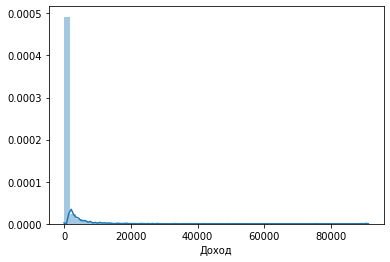

In [361]:
%matplotlib inline
import seaborn as sns
sns.distplot(gdf['Доход'])

In [353]:
'sredstva_gigieny' in adv_list_conv

False

In [356]:
for item in adv_list_conv:
    if 'Средства' in item:
        print(item)

msk_ecom_OTC_Средства ухода за полостью рта New
msk_ecom_OTC_Средства ухода за ногами
msk_ecom_OTC_Средства контрацепции, презервативы, гели-смазки New
msk_ecom_OTC_Средства ухода за полостью рта
msk_ecom_OTC_Средства от аллергии_новый
msk_ecom_Средства от пота_новый
msk_ecom_OTC_Средства контрацепции, презервативы, гели-смазки
msk_ecom_Средства от пота
msk_ecom_Средства для ежедневной гигиены
msk_ecom_Средства ухода за телом_новый
msk_ecom_Средства ежедневной гигиены_новый
msk_ecom_Rx_Средства от аллергии_новый
msk_ecom_Средства для бритья и депиляции_новый


In [349]:
len(adv_list_conv)

230

In [144]:
ZAOTsentrvnedreniyaPROTEKm[['Дата',
 'ConnectorId',
 '\"ID Кампании\"',
 '\"ID Группы объявлений\"',
 '\"ID Фразы\"',
 '\"Идентификатор K50\"',
 '\"Фраза (ключ)\"',
 '\"Фраза без минус-слов\"',
 'Минус-слова',
 'Ставка',
 '\"Ставка в РСЯ\"']].head()

,Дата,ConnectorId,"""ID Кампании""","""ID Группы объявлений""","""ID Фразы""","""Идентификатор K50""","""Фраза (ключ)""","""Фраза без минус-слов""",Минус-слова,Ставка,"""Ставка в РСЯ"""
0,18-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,0.3
1,19-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,0.3
2,17-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,0.3
3,24-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,0.3
4,23-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,0.3


In [177]:
ZAOTsentrvnedreniyaPROTEKm[['P11_Bid',
 'P11_Price',
 'P12_Bid',
 'P12_Price',
 'P13_Bid',
 'P13_Price',
 'P14_Bid',
 'P14_Price',
 'P21_Bid',
 'P21_Price',
 'P22_Bid',
 'P22_Price',
 'P23_Bid',
 'P23_Price',
 'P24_Bid',
 'P24_Price',
 'P24_Price',
 'PriceCover20',
 'PriceCover50',
 'PriceCover100']].head()

,P11_Bid,P11_Price,P12_Bid,P12_Price,P13_Bid,P13_Price,P14_Bid,P14_Price,P21_Bid,P21_Price,P22_Bid,P22_Price,P23_Bid,P23_Price,P24_Bid,P24_Price,P24_Price,PriceCover20,PriceCover50,PriceCover100
0,83.0,41.5,39.8,25.7,26.0,22.5,21.6,21.6,21.6,21.6,19.3,2.8,2.3,0.7,0.6,0.6,0.6,0.0,0.0,0.0
1,83.0,41.5,39.8,25.7,26.0,22.5,21.6,21.6,21.6,21.6,19.3,2.8,2.3,0.7,0.6,0.6,0.6,0.0,0.0,0.0
2,83.0,41.5,39.8,25.7,26.0,22.5,21.6,21.6,21.6,21.6,19.3,2.8,2.3,0.7,0.6,0.6,0.6,0.0,0.0,0.0
3,83.0,41.5,39.8,25.7,26.0,22.5,21.6,21.6,21.6,21.6,19.3,2.8,2.3,0.7,0.6,0.6,0.6,0.0,0.0,0.0
4,83.0,41.5,39.8,25.7,26.0,22.5,21.6,21.6,21.6,21.6,19.3,2.8,2.3,0.7,0.6,0.6,0.6,0.0,0.0,0.0


In [178]:
ZAOTsentrvnedreniyaPROTEKm['PriceCover20'].unique()

array([  0. ,  21.6,  28.6,   7.3,   3.7,  61.5,   5.5,  30.1,   9.2,
        13.8,   6.8,   4.3,   4.4,   5.4,  10.7,  10.4,  17. ,  22.1,
        14. ,   1.3,  26. ,   1.9,   5.3,  16.2,  11.7,  13. ,  13.7,
        10.3,   6.5,  15.3,   8.3,   8.6,  10.6,   6.4,   6.7,  26.8,
        17.5,  13.4,   3.4,  16.5,  22.7,   8.7,   9.4,   5.1,  11.4,
         6.9,   4.2,  26.9,  11.1,   5. ,   4.8,   4.6,   3.6,   4.5,
        18. ,   9.3,   6. ,  11.9,   2.9,  12.8,   3.3,   3. ,  15.9,
         6.3,   5.8,   3.9,  24.9,  43.4,  12.5,  11. ,   5.7,  38.7,
        12.9,   6.2,   7.1,   5.2,   9.6,  10.1,  39.3,  20.1,  62.3,
        21. ,  32.4,  36.9,  21.3,   3.8,  73.2,  14.3,  13.1,  48.3,
         4.9,  22.3,  40.9,   8.4,  23.5,  32.3,  16.6,   0.4,   7.9,
        64.2,  24.4,  35.6,   7. ,  12.1,   6.1,  11.8,   4. ,  13.5,
        14.4,   6.6,   4.7,  78.4,  24.2,   0.7,   9. , 163.6,  33.3,
        23.7,   8.2,   8.9,  10.8,   3.5,  15.7,   5.9,  29.8,  15. ,
         8.5,   9.5,

In [145]:
ZAOTsentrvnedreniyaPROTEKm[[
'search_bids',
 'network_bids',
 '"Показы остановлены"',
 'key_ActiveStatus',
 'param1',
 'param2',
 'key_active',
 'campaign_Name',
 'campaign_IsActive',
 'campaign_StatusArchive',
 '"Название групппы"',
 '"Статус показов"',
 'campaign_tags',
 'ad_group_tags',
 'key_tags',
 '"Директ Все Расходы"',
 '"Директ Все Показы"',
 '"Директ Все Клики"',
 'shows_average_position',
 'clicks_average_position'
]].head()

,search_bids,network_bids,"""Показы остановлены""",key_ActiveStatus,param1,param2,key_active,campaign_Name,campaign_IsActive,campaign_StatusArchive,"""Название групппы""","""Статус показов""",campaign_tags,ad_group_tags,key_tags,"""Директ Все Расходы""","""Директ Все Показы""","""Директ Все Клики""",shows_average_position,clicks_average_position
0,"""{""""AuctionBidItems"""":[{""""TrafficVolume"""":139,...",NaN,No,active,NaN,NaN,1.0,im_msk_hm_srch_Apteka_obshhie_zaprosy,Yes,No,"""интернет аптека""",ELIGIBLE,NaN,NaN,NaN,4512.79,565.0,200.0,801.95,214.81
1,"""{""""AuctionBidItems"""":[{""""TrafficVolume"""":139,...",NaN,No,active,NaN,NaN,1.0,im_msk_hm_srch_Apteka_obshhie_zaprosy,Yes,No,"""интернет аптека""",ELIGIBLE,NaN,NaN,NaN,3971.81,459.0,146.0,723.97,171.97
2,"""{""""AuctionBidItems"""":[{""""TrafficVolume"""":139,...",NaN,No,active,NaN,NaN,1.0,im_msk_hm_srch_Apteka_obshhie_zaprosy,Yes,No,"""интернет аптека""",ELIGIBLE,NaN,NaN,NaN,3898.00,571.0,180.0,840.86,212.62
3,"""{""""AuctionBidItems"""":[{""""TrafficVolume"""":139,...",NaN,No,active,NaN,NaN,1.0,im_msk_hm_srch_Apteka_obshhie_zaprosy,Yes,No,"""интернет аптека""",ELIGIBLE,NaN,NaN,NaN,3578.85,444.0,124.0,735.59,133.22
4,"""{""""AuctionBidItems"""":[{""""TrafficVolume"""":139,...",NaN,No,active,NaN,NaN,1.0,im_msk_hm_srch_Apteka_obshhie_zaprosy,Yes,No,"""интернет аптека""",ELIGIBLE,NaN,NaN,NaN,3425.02,429.0,119.0,660.84,130.36


In [181]:
ZAOTsentrvnedreniyaPROTEKm['"Название групппы"'].unique()

array(['"интернет аптека"', '"заказать лекарства"', 'солгар', ...,
       '"интернет аптека купить лекарств недорого"',
       '"интернет аптека купить лекарств через"', nan], dtype=object)

In [147]:
ZAOTsentrvnedreniyaPROTEKm[['"Директ Все Расходы"',
 '\"Директ Все Показы\"',
 '\"Директ Все Клики\"',
 'shows_average_position',
 'clicks_average_position',
 '\"Директ Сеть Клики\"',
 '\"Директ Поиск Клики"',
 '\"Директ Клики в спецразмещении\"',
 '\"Директ Клики в гарантии и ротации\"',
 '\"Директ Все Клики: компьютеры\"',
 '\"Директ Все Клики: планшеты\"',
 '\"Директ Все Клики: мобильные\"',
 '\"Директ Сеть Показы\"',
 '\"Директ Поиск Показы\"',
 '\"Директ Показы в спецразмещении\"',
 '\"Директ Показы в гарантии и ротации\"',
 '\"Директ Все Показы: компьютеры\"',
 '\"Директ Все Показы: планшеты\"',
 '\"Директ Все Показы: мобильные\"',
 '\"Директ Сеть Расход\"',
 '\"Директ Поиск Расход\"',
 '\"Директ Расход в спецразмещении\"',
 '\"Директ Расход в гарантии и ротации\"',
 '\"Директ Все Расходы: компьютеры\"',
 '\"Директ Все Расходы: планшеты\"',
 '\"Директ Все Расходы: мобильные\"',
'shows_for_average_position',
 'clicks_for_average_position',
 'shows_for_weighted_ctr',
 '"Директ Взвешенные показы"',
 'Сеансы',
 'Отказы']].head()

,"""Директ Все Расходы""","""Директ Все Показы""","""Директ Все Клики""",shows_average_position,clicks_average_position,"""Директ Сеть Клики""","""Директ Поиск Клики""","""Директ Клики в спецразмещении""","""Директ Клики в гарантии и ротации""","""Директ Все Клики: компьютеры""",...,"""Директ Расход в гарантии и ротации""","""Директ Все Расходы: компьютеры""","""Директ Все Расходы: планшеты""","""Директ Все Расходы: мобильные""",shows_for_average_position,clicks_for_average_position,shows_for_weighted_ctr,"""Директ Взвешенные показы""",Сеансы,Отказы
0,4512.79,565.0,200.0,801.95,214.81,0.0,200.0,199.0,1.0,84.0,...,10.90,2329.81,197.58,1985.40,565.0,200.0,200.0,537.0306,212.0,14.0
1,3971.81,459.0,146.0,723.97,171.97,0.0,146.0,144.0,2.0,88.0,...,33.44,2753.36,167.42,1051.03,459.0,146.0,146.0,434.4192,193.0,17.0
2,3898.00,571.0,180.0,840.86,212.62,0.0,180.0,176.0,4.0,85.0,...,106.50,2129.50,119.05,1649.45,571.0,180.0,180.0,541.8740,210.0,6.0
3,3578.85,444.0,124.0,735.59,133.22,0.0,124.0,124.0,0.0,67.0,...,0.00,2315.68,170.63,1092.54,444.0,124.0,124.0,403.8091,163.0,18.0
4,3425.02,429.0,119.0,660.84,130.36,0.0,119.0,119.0,0.0,62.0,...,0.00,2241.34,152.74,1030.94,429.0,119.0,119.0,408.6875,137.0,11.0


In [187]:
ZAOTsentrvnedreniyaPROTEKm[['"Длительность сеанса"',
 'Просмотры',
 'Транзакции',
 'Доход',
 '"CRM: Цель 1"',
 '"CRM: Цель 2"',
 '"CRM: Цель 3"',
 '"CRM: Цель 4"',
 '"CRM: Цель 5"',
 '"CRM: Прибыль (маржа) с заказов"',
 '"CRM: Доход (оборот) с заказов"',
 '"CRM:Количество заказов"',
 '"Директ wCTR"',
 '"CTR в спецразмещении"']].head()

,"""Длительность сеанса""",Просмотры,Транзакции,Доход,"""CRM: Цель 1""","""CRM: Цель 2""","""CRM: Цель 3""","""CRM: Цель 4""","""CRM: Цель 5""","""CRM: Прибыль (маржа) с заказов""","""CRM: Доход (оборот) с заказов""","""CRM:Количество заказов""","""Директ wCTR""","""CTR в спецразмещении"""
0,88614.0,1119.0,16.0,37566.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.2,37.0
1,66838.0,1116.0,26.0,34866.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.6,33.0
2,82891.0,1243.0,14.0,37463.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.2,32.5
3,68005.0,808.0,19.0,41721.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.7,30.8
4,43734.0,686.0,10.0,23578.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.1,29.6


In [ ]:
ZAOTsentrvnedreniyaPROTEKm['']

In [188]:
 ZAOTsentrvnedreniyaPROTEKm[['"Директ Ср. объем трафика"',
 '"CTR в гарантии и ротации"',
 '"Коэф. конверсии (транзакции)"',
 '"Директ CPO (транзакции)"',
 '"CPO (транзакции)"',
 '"Директ ДРР"',
 '"Директ Ср. Цена за Клик"',
 '"Доля показов в спецразмещении"',
 '"Директ CTR"',
 '"Показатель Отказов"',
 '"Ср. Время Сеанса"',
 '"Глубина просмотра"',
 '"Ср. позиция показов"',
 '"Ср. позиция кликов"',
 '"Директ Ср. Цена за 1000 показов"']].head()

,"""Директ Ср. объем трафика""","""CTR в гарантии и ротации""","""Коэф. конверсии (транзакции)""","""Директ CPO (транзакции)""","""CPO (транзакции)""","""Директ ДРР""","""Директ Ср. Цена за Клик""","""Доля показов в спецразмещении""","""Директ CTR""","""Показатель Отказов""","""Ср. Время Сеанса""","""Глубина просмотра""","""Ср. позиция показов""","""Ср. позиция кликов""","""Директ Ср. Цена за 1000 показов"""
0,95.05,3.7,8.0,282.0,282.0,12.0,22.56,95.0,35.4,6.6,7.0,5.3,1.42,1.07,7987.24
1,94.64,8.7,17.8,152.8,152.8,11.4,27.20,95.0,31.8,8.8,6.0,5.8,1.58,1.18,8653.18
2,94.90,13.8,7.8,278.4,278.4,10.4,21.66,95.0,31.5,2.9,7.0,5.9,1.47,1.18,6826.62
3,90.95,0.0,15.3,188.4,188.4,8.6,28.86,91.0,27.9,11.0,7.0,5.0,1.66,1.07,8060.47
4,95.27,0.0,8.4,342.5,342.5,14.5,28.78,94.0,27.7,8.0,5.0,5.0,1.54,1.10,7983.73


In [212]:
df_part = ZAOTsentrvnedreniyaPROTEKm[['Дата',
 'ConnectorId',
 '"ID Кампании"',
 '"ID Группы объявлений"',
 '"ID Фразы"',
'"Идентификатор K50"',
 'Ставка',
 '"Ставка в РСЯ"',
'P11_Bid',
'P11_Price',
'P12_Bid',
'P12_Price',
'P13_Bid',
'P13_Price',
'P14_Bid',
'P14_Price',
'P21_Bid',
'P21_Price',
'P22_Bid',
'P22_Price',
'P23_Bid',
'P23_Price',
'P24_Bid',
'P24_Price',
'PriceCover20',
'PriceCover50',
'PriceCover100',
'key_active',
 '"Директ Все Расходы"',
 '"Директ Все Показы"',
 '"Директ Все Клики"',
 'shows_average_position',
 'clicks_average_position',
 '"Директ Сеть Клики"',
 '"Директ Поиск Клики"',
 '"Директ Клики в спецразмещении"',
 '"Директ Клики в гарантии и ротации"',
 '"Директ Все Клики: компьютеры"',
 '"Директ Все Клики: планшеты"',
 '"Директ Все Клики: мобильные"',
 '"Директ Сеть Показы"',
 '"Директ Поиск Показы"',
 '"Директ Показы в спецразмещении"',
 '"Директ Показы в гарантии и ротации"',
 '"Директ Все Показы: компьютеры"',
 '"Директ Все Показы: планшеты"',
 '"Директ Все Показы: мобильные"',
 '"Директ Сеть Расход"',
 '"Директ Поиск Расход"',
 '"Директ Расход в спецразмещении"',
 '"Директ Расход в гарантии и ротации"',
 '"Директ Все Расходы: компьютеры"',
 '"Директ Все Расходы: планшеты"',
 '"Директ Все Расходы: мобильные"',
 'shows_for_average_position',
 'clicks_for_average_position',
 'shows_for_weighted_ctr',
 '"Директ Взвешенные показы"',
 'Сеансы',
 'Отказы',
 '"Длительность сеанса"',
 'Просмотры',
 'Транзакции',
 'Доход',
 '"Директ wCTR"',
 '"CTR в спецразмещении"',
 '"Директ Ср. объем трафика"',
 '"CTR в гарантии и ротации"',
 '"Коэф. конверсии (транзакции)"',
 '"Директ CPO (транзакции)"',
 '"CPO (транзакции)"',
 '"Директ ДРР"',
 '"Директ Ср. Цена за Клик"',
 '"Доля показов в спецразмещении"',
 '"Директ CTR"',
 '"Показатель Отказов"',
 '"Ср. Время Сеанса"',
 '"Глубина просмотра"',
 '"Ср. позиция показов"',
 '"Ср. позиция кликов"',
'"Директ Ср. Цена за 1000 показов"'                            
]]
df_part = df_part[df_part['Доход'].isnull() == False]

In [213]:
df_part.head()

,Дата,ConnectorId,"""ID Кампании""","""ID Группы объявлений""","""ID Фразы""","""Идентификатор K50""",Ставка,"""Ставка в РСЯ""",P11_Bid,P11_Price,...,"""Директ ДРР""","""Директ Ср. Цена за Клик""","""Доля показов в спецразмещении""","""Директ CTR""","""Показатель Отказов""","""Ср. Время Сеанса""","""Глубина просмотра""","""Ср. позиция показов""","""Ср. позиция кликов""","""Директ Ср. Цена за 1000 показов"""
0,18-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,50.0,0.3,83.0,41.5,...,12.0,22.56,95.0,35.4,6.6,7.0,5.3,1.42,1.07,7987.24
1,19-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,50.0,0.3,83.0,41.5,...,11.4,27.20,95.0,31.8,8.8,6.0,5.8,1.58,1.18,8653.18
2,17-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,50.0,0.3,83.0,41.5,...,10.4,21.66,95.0,31.5,2.9,7.0,5.9,1.47,1.18,6826.62
3,24-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,50.0,0.3,83.0,41.5,...,8.6,28.86,91.0,27.9,11.0,7.0,5.0,1.66,1.07,8060.47
4,23-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,50.0,0.3,83.0,41.5,...,14.5,28.78,94.0,27.7,8.0,5.0,5.0,1.54,1.10,7983.73


In [225]:
X = df_part.drop(columns = ['Дата', 'ConnectorId', '"ID Кампании"', '"ID Группы объявлений"', '"ID Фразы"', '"Идентификатор K50"', 'Доход'])
y = df_part['Доход']

In [229]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [226]:
X.fillna(0, inplace = True)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [228]:
from sklearn.linear_model import LinearRegression

In [251]:
lr = LinearRegression()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_tr = scaler.fit_transform(X_train)
X_t = scaler.transform(X_test)

lr.fit(X_tr, y_train)
lr.predict(X_t)

array([-0.88133376,  0.19679124,  0.36085374, ...,  0.31397874,
        2.05988027, 11.51376789])

In [260]:
r2_score(y_test, lr.predict(X_t))

0.509026454663601

In [254]:
from sklearn.metrics import mean_squared_error

In [258]:
mean_squared_error(y_train, lr.predict(X_tr)**(1/2))

/Users/mikhailgubarenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [238]:
mean_squared_error(y_test, lr.predict(X_test))**(1/2)

135.93173534354662

In [240]:
from sklearn.ensemble import RandomForestRegressor

In [241]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


/Users/mikhailgubarenko/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [242]:
r2_score(y_train, rfr.predict(X_train))

0.947350261117937

In [243]:
r2_score(y_test, rfr.predict(X_test))

0.7345471697992394

In [261]:

def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error

In [248]:
ZAOTsentrvnedreniyaPROTEKm[[
    '"Фраза (ключ)"',
 '"Фраза без минус-слов"',
 'Минус-слова'
]]

,"""Фраза (ключ)""","""Фраза без минус-слов""",Минус-слова
0,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."
1,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."
2,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."
3,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."
4,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."
5,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."
6,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."
7,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."
8,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."
9,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav..."


In [268]:
print(sorted(zip(lr.coef_, X.columns), reverse = True))


[(407475099026691.44, '"Директ Поиск Показы"'), (232423253026059.4, '"Директ Сеть Показы"'), (227093843102948.84, '"Директ Все Расходы: компьютеры"'), (185167188077496.5, '"Директ Поиск Клики"'), (168305133231472.25, '"Директ Все Расходы: мобильные"'), (87999015480052.7, 'P14_Bid'), (76325377464625.31, 'P24_Price'), (67015828391904.914, '"Директ Клики в спецразмещении"'), (62867563244963.97, '"Директ Все Клики"'), (56469819345799.94, '"Директ Сеть Клики"'), (38351088392158.66, '"Директ Все Расходы: планшеты"'), (24636603820099.13, '"Директ CPO (транзакции)"'), (20527122811806.555, '"Директ Клики в гарантии и ротации"'), (101.271484375, 'Транзакции'), (31.16971649394479, 'P13_Price'), (23.935546875, 'shows_average_position'), (13.23046875, '"Коэф. конверсии (транзакции)"'), (5.384765625, 'clicks_average_position'), (5.3702392578125, 'Сеансы'), (5.271484375, '"Длительность сеанса"'), (3.561017079156339, 'P12_Bid'), (2.181640625, 'Отказы'), (1.982421875, '"CTR в спецразмещении"'), (1.5013

In [269]:
ZAOTsentrvnedreniyaPROTEKm[[
'Дата',
'"ID Кампании"',
'"Идентификатор K50"',
'"Фраза без минус-слов"',
'Ставка',
'"Ставка в РСЯ"',
'P11_Bid',
'P11_Price',
'P12_Bid',
'P12_Price',
'P13_Bid',
'P13_Price',
'P14_Bid',
'P14_Price',
'P21_Bid',
'P21_Price',
'P22_Bid',
'P22_Price',
'P23_Bid',
'P23_Price',
'P24_Bid',
'P24_Price',
'PriceCover20',
'PriceCover50',
'PriceCover100',
'key_active',
'"Директ Все Расходы"',
'"Директ Все Показы"',
'"Директ Все Клики"',
'shows_average_position',
'clicks_average_position',
'"Директ Сеть Клики"',
'"Директ Поиск Клики"',
'"Директ Клики в спецразмещении"',
'"Директ Клики в гарантии и ротации"',
'"Директ Все Клики: компьютеры"',
'"Директ Все Клики: планшеты"',
'"Директ Все Клики: мобильные"',
'"Директ Сеть Показы"',
'"Директ Поиск Показы"',
'"Директ Показы в спецразмещении"',
'"Директ Показы в гарантии и ротации"',
'"Директ Все Показы: компьютеры"',
'"Директ Все Показы: планшеты"',
'"Директ Все Показы: мобильные"',
'"Директ Сеть Расход"',
'"Директ Поиск Расход"',
'"Директ Расход в спецразмещении"',
'"Директ Расход в гарантии и ротации"',
'"Директ Все Расходы: компьютеры"',
'"Директ Все Расходы: планшеты"',
'"Директ Все Расходы: мобильные"',
'shows_for_average_position',
'clicks_for_average_position',
'shows_for_weighted_ctr',
'"Директ Взвешенные показы"',
'Сеансы',
'Отказы',
'"Длительность сеанса"',
'Просмотры',
'Транзакции',
'Доход',
'"Директ wCTR"',
'"CTR в спецразмещении"',
'"Директ Ср. объем трафика"',
'"CTR в гарантии и ротации"',
'"Коэф. конверсии (транзакции)"',
'"Директ CPO (транзакции)"',
'"CPO (транзакции)"',
'"Директ ДРР"',
'"Директ Ср. Цена за Клик"',
'"Доля показов в спецразмещении"',
'"Директ CTR"',
'"Показатель Отказов"',
'"Ср. Время Сеанса"',
'"Глубина просмотра"',
'"Ср. позиция показов"',
'"Ср. позиция кликов"',
'"Директ Ср. Цена за 1000 показов"'   
]]

,Дата,ConnectorId,"""ID Кампании""","""ID Группы объявлений""","""ID Фразы""","""Идентификатор K50""","""Фраза (ключ)""","""Фраза без минус-слов""",Минус-слова,Ставка,...,"""Директ ДРР""","""Директ Ср. Цена за Клик""","""Доля показов в спецразмещении""","""Директ CTR""","""Показатель Отказов""","""Ср. Время Сеанса""","""Глубина просмотра""","""Ср. позиция показов""","""Ср. позиция кликов""","""Директ Ср. Цена за 1000 показов"""
0,18-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,12.0,22.56,95.0,35.4,6.6,7.0,5.3,1.42,1.07,7987.24
1,19-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,11.4,27.20,95.0,31.8,8.8,6.0,5.8,1.58,1.18,8653.18
2,17-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,10.4,21.66,95.0,31.5,2.9,7.0,5.9,1.47,1.18,6826.62
3,24-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,8.6,28.86,91.0,27.9,11.0,7.0,5.0,1.66,1.07,8060.47
4,23-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,14.5,28.78,94.0,27.7,8.0,5.0,5.0,1.54,1.10,7983.73


In [275]:
ZAOTsentrvnedreniyaPROTEKm[ZAOTsentrvnedreniyaPROTEKm['campaign_IsActive'] == 0]

Series([], Name: Доход, dtype: float64)

In [276]:
ZAOTsentrvnedreniyaPROTEKm['campaign_IsActive'].value_counts()

Yes        1694564
No          416693
UNKNOWN      20010
Name: campaign_IsActive, dtype: int64

In [287]:
# list(ZAOTsentrvnedreniyaPROTEKm.columns)

In [293]:
features_with_target = ['Дата',
 '"ID Кампании"',
 '"Идентификатор K50"',
 '"Фраза без минус-слов"',
 'Ставка', #ср
 '"Ставка в РСЯ"', #ср
 'P11_Bid', #ср
 'P12_Bid',#ср
 'P13_Bid',#ср
 'P14_Bid',#ср
 'P21_Bid',#ср
 'P22_Bid',#ср
 'P23_Bid',#ср
 'P24_Bid',#ср
 'key_ActiveStatus', #-- берем активные только
 'campaign_IsActive', #-- берем активные только
 '"Название групппы"', # -- для фронта
 '"Директ Все Расходы"',#сумм
 '"Директ Все Показы"',#сумм #фронт + 
 '"Директ Все Клики"',#сумм #фронт +
 'shows_average_position', #ср #подумать на фронт
 'clicks_average_position',#ср #подумать на фронт
 '"Директ Сеть Клики"', #сумм
 '"Директ Поиск Клики"', #сумм
 '"Директ Клики в спецразмещении"',#сумм
 '"Директ Клики в гарантии и ротации"',#сумм
 '"Директ Все Клики: компьютеры"',#сумм
 '"Директ Все Клики: планшеты"',#сумм
 '"Директ Все Клики: мобильные"',#сумм
 '"Директ Сеть Показы"',#сумм
 '"Директ Поиск Показы"',#сумм
 '"Директ Показы в спецразмещении"',#сумм
 '"Директ Показы в гарантии и ротации"',#сумм
 '"Директ Все Показы: компьютеры"',#сумм
 '"Директ Все Показы: планшеты"',#сумм
 '"Директ Все Показы: мобильные"',#сумм
 '"Директ Сеть Расход"',#сумм
 '"Директ Поиск Расход"',#сумм
 '"Директ Расход в спецразмещении"',#сумм
 '"Директ Расход в гарантии и ротации"',#сумм
 '"Директ Все Расходы: компьютеры"',#сумм
 '"Директ Все Расходы: планшеты"',#сумм
 '"Директ Все Расходы: мобильные"', #сумм
 'shows_for_weighted_ctr',
 'Сеансы',
 'Отказы',
 '"Длительность сеанса"',
 '"Директ wCTR"',
 '"CTR в спецразмещении"',
 '"Директ Ср. объем трафика"',
 '"CTR в гарантии и ротации"',
 '"Коэф. конверсии (транзакции)"',
 '"Директ CPO (транзакции)"',
 '"CPO (транзакции)"',
 '"Директ ДРР"',
 '"Директ Ср. Цена за Клик"',
 '"Доля показов в спецразмещении"',
 '"Директ CTR"',
 '"Показатель Отказов"',
 '"Ср. Время Сеанса"',
 '"Глубина просмотра"',
 '"Ср. позиция показов"',
 '"Ср. позиция кликов"',
 '"Директ Ср. Цена за 1000 показов"',
 'Доход']

In [ ]:
for 

In [306]:
ZAOTsentrvnedreniyaPROTEKm.columns = [col.replace('"', '') for col in ZAOTsentrvnedreniyaPROTEKm.columns]
features_with_target = [col.replace('"', '') for col in features_with_target]

In [308]:
direct_data = ZAOTsentrvnedreniyaPROTEKm[features_with_target]
direct_data = direct_data[(direct_data['key_ActiveStatus'] == 'active') & (direct_data['campaign_IsActive'] == 'Yes')]

In [309]:
direct_data.head()

,Дата,ID Кампании,Идентификатор K50,Фраза без минус-слов,Ставка,Ставка в РСЯ,P11_Bid,P12_Bid,P13_Bid,P14_Bid,...,Директ Ср. Цена за Клик,Доля показов в спецразмещении,Директ CTR,Показатель Отказов,Ср. Время Сеанса,Глубина просмотра,Ср. позиция показов,Ср. позиция кликов,Директ Ср. Цена за 1000 показов,Доход
0,18-09-2019,37550400,100000014522549169,"""интернет аптека""",50.0,0.3,83.0,39.8,26.0,21.6,...,22.56,95.0,35.4,6.6,7.0,5.3,1.42,1.07,7987.24,37566.90
1,19-09-2019,37550400,100000014522549169,"""интернет аптека""",50.0,0.3,83.0,39.8,26.0,21.6,...,27.20,95.0,31.8,8.8,6.0,5.8,1.58,1.18,8653.18,34866.01
2,17-09-2019,37550400,100000014522549169,"""интернет аптека""",50.0,0.3,83.0,39.8,26.0,21.6,...,21.66,95.0,31.5,2.9,7.0,5.9,1.47,1.18,6826.62,37463.54
3,24-09-2019,37550400,100000014522549169,"""интернет аптека""",50.0,0.3,83.0,39.8,26.0,21.6,...,28.86,91.0,27.9,11.0,7.0,5.0,1.66,1.07,8060.47,41721.06
4,23-09-2019,37550400,100000014522549169,"""интернет аптека""",50.0,0.3,83.0,39.8,26.0,21.6,...,28.78,94.0,27.7,8.0,5.0,5.0,1.54,1.10,7983.73,23578.00


In [310]:
cols_agg_sum = ['Директ Все Расходы',
'Директ Все Показы',
'Директ Все Клики',
'Директ Сеть Клики',
'Директ Поиск Клики',
'Директ Клики в спецразмещении',
'Директ Клики в гарантии и ротации',
'Директ Все Клики: компьютеры',
'Директ Все Клики: планшеты',
'Директ Все Клики: мобильные',
'Директ Сеть Показы',
'Директ Поиск Показы',
'Директ Показы в спецразмещении',
'Директ Показы в гарантии и ротации',
'Директ Все Показы: компьютеры',
'Директ Все Показы: планшеты',
'Директ Все Показы: мобильные',
'Директ Все Расходы: компьютеры',
'Директ Все Расходы: планшеты',
'Директ Все Расходы: мобильные',
'Сеансы',
'Отказы',
'Просмотры',
'Доход',
'CRM: Доход (оборот) с заказов']

In [311]:
direct_data.groupby(['Дата', 'ID Кампании']).agg({[cols_agg_sum] : 'sum'})

TypeError: unhashable type: 'list'

In [316]:
ZAOTsentrvnedreniyaPROTEKm['Доход'].sum()

7849384.039999997

In [317]:
direct_data['Доход'].shape[0]

1503325

In [321]:
direct_data[direct_data['Доход'] == 0].sample(n=30000, random_state=1)['ID Кампании']

165